## Section 3: Machine Learning

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Logistic Regression from SKLearn
from sklearn.linear_model import LogisticRegression

#Decision Tree from SKLearn
from sklearn import tree
from sklearn.tree import export_text
import graphviz

#train and tests spliting
from sklearn.model_selection import train_test_split

#metrics for the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression

In [53]:
LDF.columns

Index(['net_profit/total_assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '[(cash + short-term securities + receivables-short-term liabilities) / (operating expenses - depreciation)] * 365',
       'retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'profit o

In [125]:
y = LDF['bankruptcy']
y = np.array(y)

In [161]:
X1 = np.array(LDF['total costs /total sales']).reshape(-1,1)
X2 = np.array(LDF['retained earnings / total assets']).reshape(-1,1)
X3 = np.array(LDF['working capital']).reshape(-1,1)

X4 = np.array(LDF['EBITDA (profit on operating activities - depreciation) / sales']).reshape(-1,1)

#having an issue using multiple
XC = np.array(LDF[['working capital','retained earnings / total assets','total costs /total sales']]).reshape(-1,1)

In [162]:
X1
X2
X3
X4

XC

array([[ 3.4869e+05],
       [ 3.8825e-01],
       [ 8.7804e-01],
       ...,
       [-4.2513e+02],
       [-1.0537e-01],
       [ 1.0522e+00]])

In [165]:
clf1 = LogisticRegression().fit(X1,y)
clf2 = LogisticRegression().fit(X2,y)
clf3 = LogisticRegression().fit(X3,y)
clf4 = LogisticRegression().fit(X4,y)


#clf5 = LogisticRegression().fit(XC,y)

In [155]:
clf1.predict(X1)
clf2.predict(X2)
clf3.predict(X3)

clf4.predict(X4)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
print(clf1.score(X1,y))
print(clf2.score(X2,y))
print(clf3.score(X3,y))

print(clf4.score(X4,y))

0.9518258265176823
0.9518488653380947
0.9517336712360327
0.9518258265176823


### Decision Tree

In [3]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [4]:
LDF = pd.read_csv('LDF')

In [5]:
#LDF['bankruptcy'].replace(0,"Not Bankrupt", inplace = True)
#LDF['bankruptcy'].replace(1,"Bankrupt", inplace = True)

In [70]:
X = LDF.iloc[:,0:64]
y = LDF['bankruptcy']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=26)

In [102]:
y_test.count()

8681

In [108]:
clf = tree.DecisionTreeClassifier(min_samples_split=20, max_depth = 6)
clf = clf.fit(X_train, y_train)

In [109]:
y_pred = clf.predict(X_test)

In [110]:
y_train.count()

34724

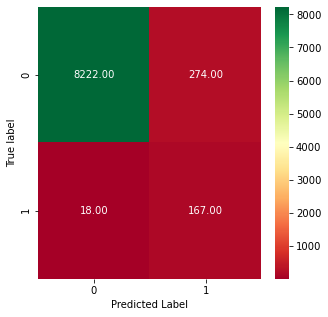

In [111]:
plot_cm(y_pred, y_test)

In [112]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8496
           1       0.38      0.90      0.53       185

    accuracy                           0.97      8681
   macro avg       0.69      0.94      0.76      8681
weighted avg       0.98      0.97      0.97      8681



[Text(198.6159836065574, 205.35999999999999, 'X[26] <= 462.753\ngini = 0.09\nsamples = 30383\nvalue = [28954, 1429]'),
 Text(111.82868852459016, 181.2, 'X[25] <= 0.036\ngini = 0.066\nsamples = 27660\nvalue = [26715, 945]'),
 Text(45.10881147540984, 157.04, 'X[33] <= 0.272\ngini = 0.176\nsamples = 5436\nvalue = [4906, 530]'),
 Text(10.97704918032787, 132.88, 'X[3] <= 0.055\ngini = 0.026\nsamples = 1731\nvalue = [1708, 23]'),
 Text(5.488524590163935, 108.72, 'X[45] <= 0.002\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(2.7442622950819673, 84.56, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(8.232786885245902, 84.56, 'gini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(16.465573770491805, 108.72, 'X[2] <= 0.996\ngini = 0.015\nsamples = 1710\nvalue = [1697, 13]'),
 Text(13.721311475409836, 84.56, 'X[4] <= -647.58\ngini = 0.014\nsamples = 1709\nvalue = [1697, 12]'),
 Text(8.232786885245902, 60.400000000000006, 'X[4] <= -655.505\ngini = 0.15\nsamples = 110\nvalue = [101, 9]'),
 

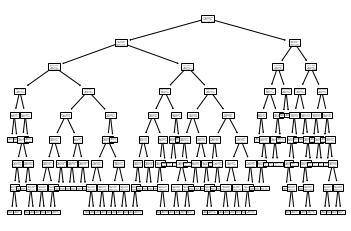

In [90]:
tree.plot_tree(clf)